# MSADS 507 Final Project

**By: Halle Davis, Claire Phibbs, and UE Wang**

## Importing Libraries

In [3]:
import numpy as no
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt 
import plotly.graph_objects as pg
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

userName = 'root'
userPass = 'yb%Q8!ec'

## Creating SQL DB Connection to gravity_books

In [4]:
conn=mysql.connect(host='localhost',port=int(3306),user=userName,passwd=userPass,db='gravity_books')

In [5]:
tableNames = pd.read_sql("""SHOW TABLES""", conn) 
tableNames

,Tables_in_gravity_books
0,address
1,address_status
2,author
3,author_books_rank
4,authuor_sell_rank
5,best_selling_books
6,book
7,book_author
8,book_language
9,books_country_profit


## Exploratory Data Analysis

In [6]:
# Transaction period in this database
transaction_period = pd.read_sql_query("""
SELECT * FROM transaction_period;
""" , con = conn) 

transaction_period

,Record_From,Record_To
0,2020-02-27 14:47:07,2023-02-26 13:15:21


In [7]:
# Books sold per year
books_sold = pd.read_sql_query("""
SELECT * FROM books_sold_per_year;
""" , con = conn) 

books_sold

,Orders_Total,Sales_Year
0,2068,2020
1,2470,2021
2,2595,2022
3,417,2023


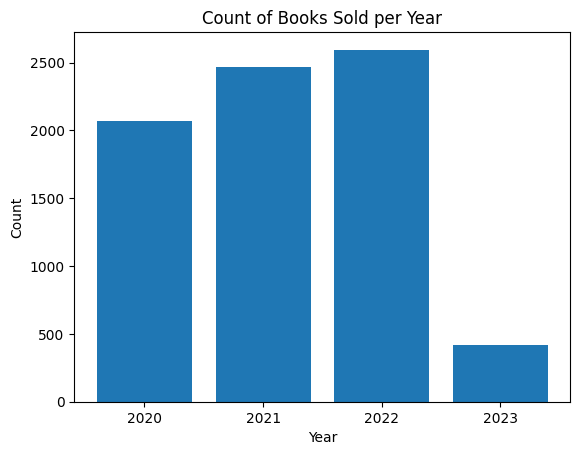

In [8]:
# plot of books sold per year
plt.bar(books_sold['Sales_Year'], books_sold['Orders_Total'])
plt.title('Count of Books Sold per Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [9]:
# Books sold per month
books_sold_month = pd.read_sql_query("""
SELECT * FROM books_sold_month;
""" , con = conn) 

books_sold_month

,Year,Month,num_books
0,2021,5,229
1,2020,4,184
2,2021,2,193
3,2021,12,215
4,2021,7,209
5,2020,11,190
6,2022,4,232
7,2023,1,243
8,2020,10,200
9,2021,1,207


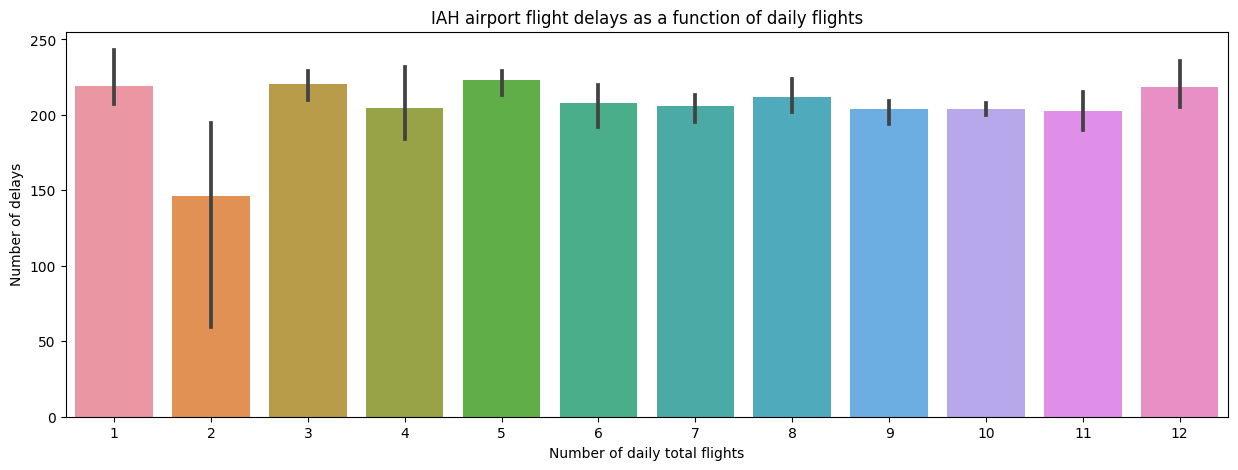

In [17]:
# plot of books sold per month
plt.figure(figsize = (15,5))
sns.barplot(data = books_sold_month,y ='num_books',x = 'Month')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("IAH airport flight delays as a function of daily flights");

In [11]:
# Customer total, total orders, and books sold
pd.read_sql_query("""
SELECT * FROM whole_period_stats;
""" , con = conn) 

,cust_tt,order_tt,book_tt
0,1701,15400,15400


In [12]:
# Top ten customers who purchased the most books
pd.read_sql_query("""

SELECT * FROM value_customer;

""" , con = conn) 

,customer_id,first_name,last_name,books_num
0,651,Dorie,Burkinshaw,22
1,1155,Dorice,Petris,21
2,1907,Uriah,Blown,19
3,66,Carlene,Robbings,19
4,30,Matthiew,Donizeau,18
5,659,Tobey,Vallens,18
6,781,Leonerd,Cannon,18
7,379,Roch,Columbine,18
8,1402,Angel,Quenby,18
9,1788,Rolland,Bartrap,17


In [13]:
# Customer's shipping method preference
shipping_method = pd.read_sql_query("""
SELECT * FROM ship_meth;
""" , con = conn) 

shipping_method

,method_name,num,Percent of total
0,Standard,1936,25.64238
1,International,1888,25.00662
2,Express,1886,24.98013
3,Priority,1840,24.37086


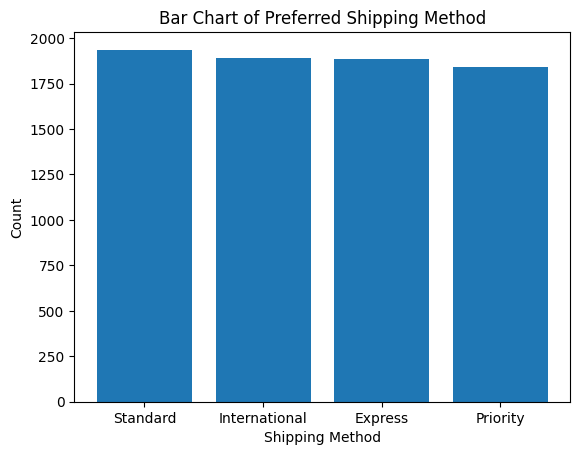

In [14]:
# plot preferred shipping method
plt.bar(shipping_method['method_name'], shipping_method['num'])
plt.title('Bar Chart of Preferred Shipping Method')
plt.ylabel('Count')
plt.xlabel('Shipping Method')
plt.show()

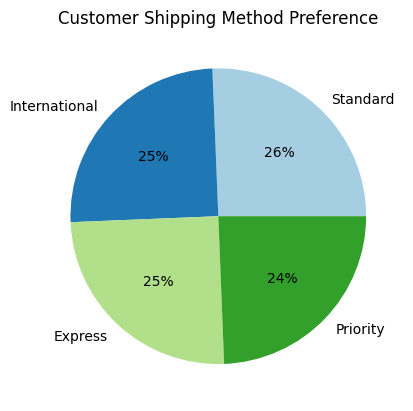

In [16]:
data = shipping_method['num']
labels = shipping_method['method_name']
custom_palette = sns.color_palette("Paired", 9)
plt.pie(data, labels = labels,colors = custom_palette, autopct='%.0f%%')
plt.title('Customer Shipping Method Preference')
plt.show()

In [13]:
# Top 5 authors who published the most books
published_books = pd.read_sql_query("""
SELECT * FROM author_books_rank;
""" , con = conn) 

published_books

,author_id,author_name,Books Published
0,8222,Stephen King,70
1,7875,Sandra Brown,46
2,6584,P.G. Wodehouse,45
3,5995,Mercedes Lackey,43
4,6560,Orson Scott Card,40


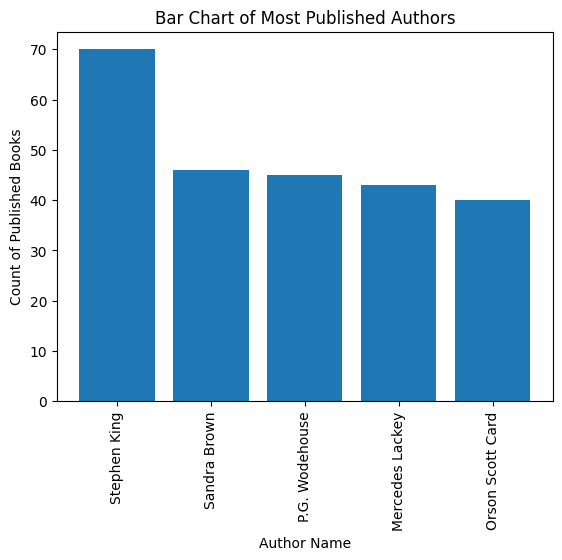

In [14]:
# plot of top 5 published authors 
plt.bar(published_books['author_name'], published_books['Books Published'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Bar Chart of Most Published Authors')
plt.ylabel('Count of Published Books')
plt.xlabel('Author Name')
plt.show()

In [15]:
# Top 10 best-selling books
best_seller = pd.read_sql_query("""
SELECT * FROM best_selling_books;
""" , con = conn) 

best_seller

,book_id,Boook_Name,num
0,1868,Masters of Small Worlds: Yeoman Households Ge...,8
1,975,John Hammond on Record: An Autobiography,7
2,2835,The Poet of Tolstoy Park,7
3,5326,The Clan of the Cave Bear (Earth's Children #1),7
4,7698,Code of the Samurai: A Modern Translation of t...,7
5,6733,True Story,7
6,7103,Hannibal,7
7,1453,East of Eden,6
8,1707,A Room of One's Own,6
9,1729,Anaximander Heraclitus Parmenides Plotinus ...,6


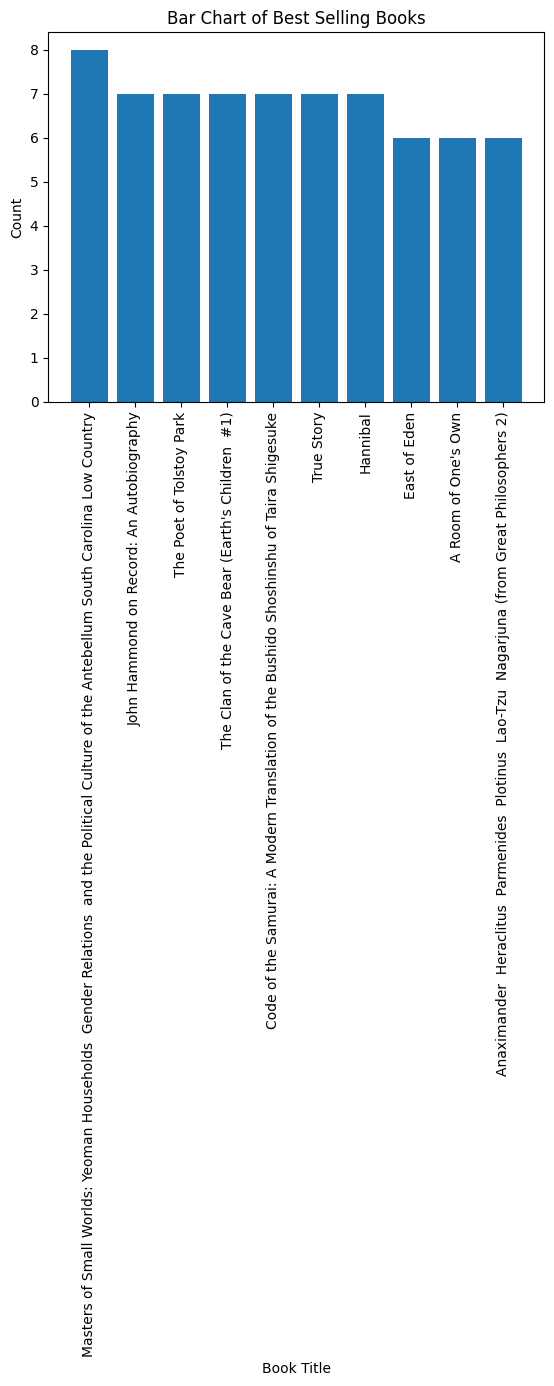

In [16]:
# plot of best selling books
plt.bar(best_seller['Boook_Name'], best_seller['num'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Bar Chart of Best Selling Books')
plt.ylabel('Count')
plt.xlabel('Book Title')
plt.show()

In [17]:
# Top 10 most profitable books
books_profit = pd.read_sql_query("""
SELECT * FROM books_profit;
""" , con = conn) 

books_profit

,book_id,Book_Name,author_name,Profit
0,5995,Frogs/Assemblywomen/Wealth (Loeb Classical Lib...,Mercedes Lackey,1523.06
1,1453,East of Eden,Clive Cussler,1433.76
2,8759,Last Train to Paradise: Henry Flagler and the ...,Tracy Hickman,1205.36
3,79,Roverandom,Agatha Christie,1170.78
4,5083,Pathologies of Power: Health Human Rights and...,Laura Ingalls Wilder,1167.60
5,2170,Sliver of Truth (Ridley Jones #2),Dr. Seuss,1164.68
6,8803,For Her Own Good: Two Centuries of the Experts...,Ursula K. Le Guin,983.00
7,2673,The Best of H.P. Lovecraft: Bloodcurdling Tale...,Francine Pascal,919.88
8,6680,The Ballet Companion: A Dancer's Guide to the ...,Patrick O'Brian,903.90
9,7761,The Feynman Lectures on Physics Vol 2,Rumiko Takahashi,902.85


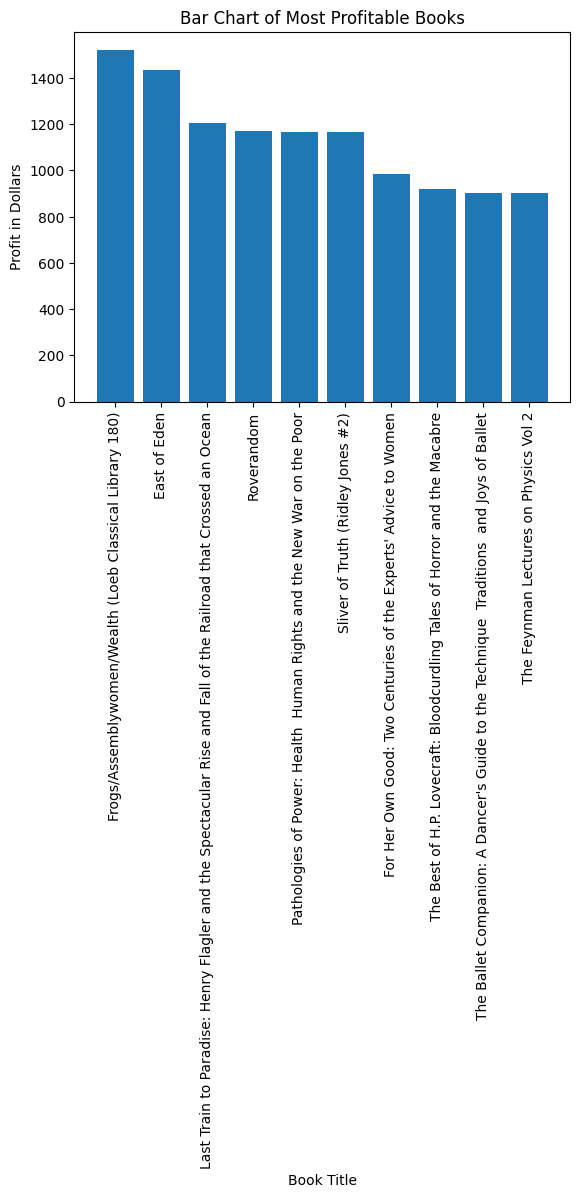

In [18]:
# plot of most profitable books
plt.bar(books_profit['Book_Name'], books_profit['Profit'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Bar Chart of Most Profitable Books')
plt.ylabel('Profit in Dollars')
plt.xlabel('Book Title')
plt.show()

In [19]:
# Rank of Languages- count of books in each language 
book_lang = pd.read_sql_query("""
SELECT * FROM books_language;
""" , con = conn) 

book_lang

,language_id,language_name,num,Percent of total
0,1,English,8911,80.08448
1,2,United States English,1409,12.66289
2,4,Spanish,218,1.95920
3,5,British English,214,1.92325
4,3,French,144,1.29415
5,10,German,99,0.88973
6,11,Japanese,46,0.41341
7,6,Multiple Languages,19,0.17076
8,14,Chinese,14,0.12582
9,7,Greek,11,0.09886


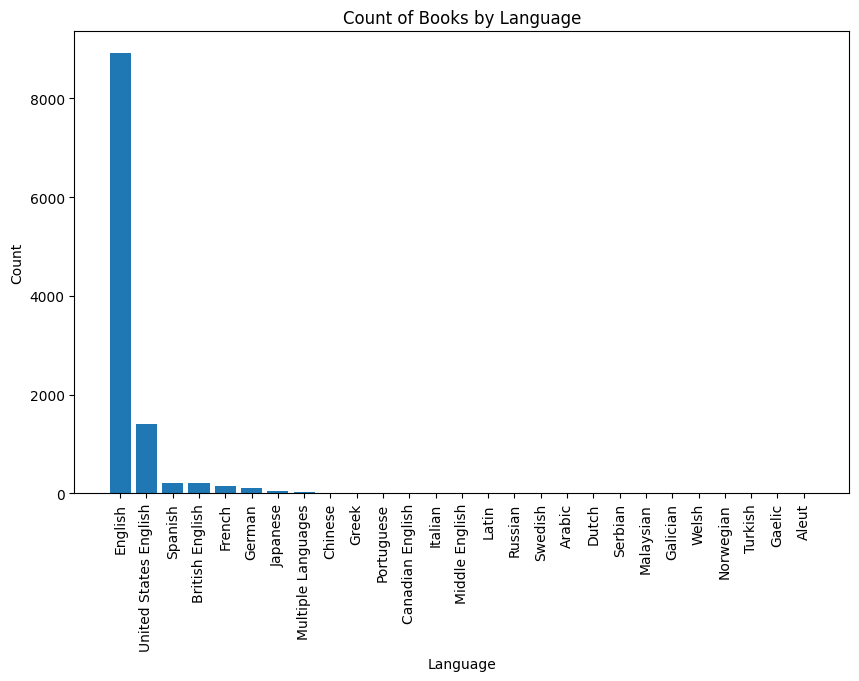

In [20]:
# plot of count of books in each language 
plt.figure(figsize=(10,6))
plt.bar(book_lang['language_name'], book_lang['num'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Count of Books by Language')
plt.ylabel('Count')
plt.xlabel('Language')
plt.show()

In [21]:
# Top 5 profitable customers
pro_cust = pd.read_sql_query("""
SELECT * FROM cust_profit;
""" , con = conn) 

pro_cust

,customer_id,first_name,last_name,Spent
0,58,Jeni,Swarbrigg,759.52
1,2,Ruthanne,Vatini,748.25
2,53,Garold,Kobisch,625.01
3,180,Shay,Flaverty,554.80
4,278,Gonzalo,Perch,551.27


In [22]:
# The top ten cities have the most orders placed by customers
orders_by_city = pd.read_sql_query("""
SELECT * FROM cust_city;
""" , con = conn) 

orders_by_city

,city,country_name,COUNT(*),Percent of total
0,Dallas,United States of America,210,0.65988
1,Bucay,Philippines,186,0.58446
2,Inanwatan,Indonesia,157,0.49334
3,Krikil,Indonesia,151,0.47448
4,Huddinge,Sweden,144,0.45249
5,Valenciennes,France,142,0.44620
6,Sumberejo,Indonesia,136,0.42735
7,Fuli,China,134,0.42107
8,Kyzyl,Russia,123,0.38650
9,Chengguan,China,122,0.38336


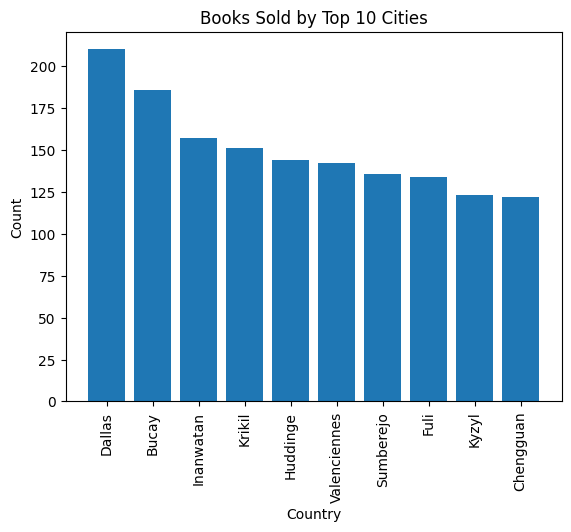

In [23]:
# plot of top 10 cities customers placed orders in 
plt.bar(orders_by_city['city'], orders_by_city['COUNT(*)'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Books Sold by Top 10 Cities')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

In [24]:
# Sales by order date
order_date = pd.read_sql_query("""
SELECT * FROM order_date_sale;
""" , con = conn) 

order_date

,order_date,num_books,Profit
0,2021-11-05 11:07:30,2,23.36
1,2020-11-29 13:14:54,3,25.00
2,2022-05-12 10:44:53,2,8.83
3,2022-04-19 16:07:50,1,18.45
4,2023-01-26 20:54:08,2,21.16
...,...,...,...
7542,2021-11-09 03:18:16,3,30.39
7543,2020-12-28 10:57:45,1,14.35
7544,2020-10-10 13:34:16,2,9.75
7545,2021-06-14 18:12:54,3,23.96


In [25]:
# Viewing combined tables of income, population, and book's sale data
pd.read_sql_query("""
SELECT * FROM pop_income_books;
""" , con = conn) 

,country_name,books2020,population2020,books2021,population2021,incomegroup
0,Afghanistan,8,38972230,10,40099462,Low income
1,Albania,9,2837849,8,2811666,Upper middle income
2,Argentina,29,45376763,33,45808747,Upper middle income
3,Armenia,20,2805608,29,2790974,Upper middle income
4,Australia,2,25655289,6,25688079,High income
...,...,...,...,...,...,...
62,New Zealand,13,5090200,11,5122600,High income
63,Pakistan,6,227196741,8,231402117,Lower middle income
64,Panama,5,4294396,10,4351267,High income
65,Peru,56,33304756,53,33715471,Upper middle income


In [26]:
# combined tables of income, population, and book sale data
Country_YM_Books = pd.read_sql_query("""
SELECT * FROM Country_YM_Books;
""" , con = conn) 

Country_YM_Books

,country_name,Year,Month,books_sold,Profit
0,Afghanistan,2021,5,4,37.84
1,Afghanistan,2023,2,1,17.22
2,Afghanistan,2022,6,4,41.28
3,Afghanistan,2020,7,2,26.12
4,Afghanistan,2020,8,4,36.65
...,...,...,...,...,...
1224,Philippines,2020,10,11,85.13
1225,Philippines,2020,12,9,72.21
1226,Philippines,2022,6,8,89.55
1227,Philippines,2021,2,11,122.90


In [27]:
# Total Book Sold and Profit by Country and its Population and Income Level
ppi = pd.read_sql_query("""
SELECT * 
FROM profit_pop_in;
""" , con = conn) 

ppi

,country_name,Books_Sold,Profit,population,incomegroup
0,Afghanistan,71,741.49,40099462,Low income
1,Albania,46,479.71,2811666,Upper middle income
2,Argentina,192,1948.52,45808747,Upper middle income
3,Armenia,167,1606.54,2790974,Upper middle income
4,Australia,34,308.78,25688079,High income
...,...,...,...,...,...
65,New Zealand,81,778.90,5122600,High income
66,Pakistan,56,555.16,231402117,Lower middle income
67,Panama,41,406.74,4351267,High income
68,Peru,339,3351.95,33715471,Upper middle income


## Transforming Data Types:

In [28]:
pro_cust['Name'] = pro_cust['first_name'] + ' ' + pro_cust['last_name']
order_date['order_date'] = pd.to_datetime(order_date['order_date']).dt.date

## Loading Changes in Tables to CSV:

In [29]:
pro_cust.to_csv('pro_cust.csv')
order_date.to_csv('order_date.csv')

## Visualizing the Data for Analysis:

In [30]:
orders_by_incomegroup = pd.read_sql_query("""
select i.incomegroup, count(co.order_id) as totalorders, count(distinct(c.country_name)) as numcountries
from cust_order co
join address a on a.address_id = co.dest_address_id
join country c on a.country_id = c.country_id
join income i on i.countryname = c.country_name
group by i.incomegroup
""" , con = conn)

orders_by_incomegroup

,incomegroup,totalorders,numcountries
0,High income,791,22
1,Low income,110,6
2,Lower middle income,1773,18
3,Upper middle income,2598,24


In [31]:
fig = px.bar(orders_by_incomegroup, x='incomegroup', y='totalorders',
             title = 'Number of Orders by Country Income Group',
             labels={
                     "incomegroup": "Country Income Group for Order Destination",
                     "totalorders": "Total Orders"
            })
fig.show()

In [32]:
fig = pg.Figure(data=[pg.Bar(
    name = 'Total Orders',
    x = orders_by_incomegroup.iloc[:, 0],
    y = orders_by_incomegroup.iloc[:, 1]/10 #Divided by 10 to see the country difference beterr
   ),
                       pg.Bar(
    name = 'Total Countries',
    x = orders_by_incomegroup.iloc[:, 0],
    y = orders_by_incomegroup.iloc[:, 2]
   )
])

fig.show()

## We can see that all groups by low income have the same number of countries within them,
# so the differences in total orders can not be explained just by the number of countries within the group

In [33]:
orders_by_pop = pd.read_sql_query("""
select c.country_name, p.population2020, count(co.order_id) as totalorders
from cust_order co
join address a on a.address_id = co.dest_address_id
join country c on a.country_id = c.country_id
join population p on p.countryname = c.country_name
group by c.country_name, p.population2020
""" , con = conn)

orders_by_pop

,country_name,population2020,totalorders
0,Afghanistan,38972230,34
1,Albania,2837849,28
2,Argentina,45376763,91
3,Armenia,2805608,80
4,Australia,25655289,14
...,...,...,...
84,Uzbekistan,34232050,14
85,Vietnam,96648685,72
86,Samoa,214929,14
87,Kosovo,1790133,7


In [34]:
fig = px.scatter(orders_by_pop, x="population2020", y="totalorders",
             title = 'Number of Orders by Country Population',
             labels={
                     "population2020": "Country Population",
                     "totalorders": "Total Orders"
            })
fig.show()

In [35]:
spend_by_country = pd.read_sql_query("""
select
   c.country_name as country, sum(ol.price) 'Total amount spent by country'
from cust_order co
join order_line ol on ol.order_id = co.order_id
join customer_address ca on ca.customer_id = co.customer_id
join address a on a.address_id = ca.address_id
join country c on c.country_id = a.country_id
group by c.country_name
order by 2 DESC
;
""" , con = conn)

spend_by_country


,country,Total amount spent by country
0,China,57914.92
1,Indonesia,50091.94
2,Russia,21384.92
3,Brazil,15259.41
4,Portugal,11678.09
...,...,...
100,Montenegro,166.79
101,Luxembourg,129.27
102,Taiwan,121.22
103,Latvia,110.59


In [45]:
fig = px.bar(spend_by_country, x='country', y='Total amount spent by country',
             title = 'Total Amount spent by Country Across all Years',
             labels={
                     "country": "Country",
                     "Total amount spent by country": "Total Amount Spent by Country in Dollars"
            })
fig.show()

In [37]:
spend_by_incomegroup = pd.read_sql_query("""
select i.incomegroup, sum(ol.price) as totalspend
from cust_order co
join order_line ol on ol.order_id = co.order_id
join address a on a.address_id = co.dest_address_id
join country c on a.country_id = c.country_id
join income i on i.countryname = c.country_name
group by i.incomegroup
""" , con = conn)

spend_by_incomegroup

,incomegroup,totalspend
0,Low income,2195.12
1,Upper middle income,53035.59
2,High income,15791.50
3,Lower middle income,36517.82


In [38]:
fig = px.bar(spend_by_incomegroup, x='incomegroup', y='totalspend',
             title = 'Total Spend by Country Income Group',
             labels={
                     "incomegroup": "Order Destination Country Income Group",
                     "totalspend": "Total Spend"
            })
fig.show()

In [39]:
spend_by_pop = pd.read_sql_query("""
select c.country_name, p.population2020, sum(ol.price) as totalspend
from cust_order co
join order_line ol on ol.order_id = co.order_id
join address a on a.address_id = co.dest_address_id
join country c on a.country_id = c.country_id
join population p on p.countryname = c.country_name
group by c.country_name, p.population2020
""" , con = conn)

spend_by_pop

,country_name,population2020,totalspend
0,Afghanistan,38972230,741.49
1,Albania,2837849,479.71
2,Argentina,45376763,1948.52
3,Armenia,2805608,1606.54
4,Australia,25655289,308.78
...,...,...,...
84,Uganda,44404611,107.69
85,Ukraine,44132049,2636.67
86,Uzbekistan,34232050,338.45
87,Vietnam,96648685,1411.66


In [40]:
fig = px.scatter(spend_by_pop, x="population2020", y="totalspend", text="country_name",
             title = 'Total Spend by Population',
             labels={
                     "population2020": "Country Population",
                     "totalspend": "Total Spend"
            })
fig.show()

### Removing Outlier Countries (Indonesia and China):

In [41]:
spend_by_pop.loc[spend_by_pop['country_name'] == 'China']

,country_name,population2020,totalspend
13,China,1411100000,28585.33


In [42]:
spend_by_pop.loc[spend_by_pop['country_name'] == 'Indonesia']

,country_name,population2020,totalspend
40,Indonesia,271857970,22884.7


In [43]:
spend_by_pop = spend_by_pop.drop([13,40])

In [44]:
fig = px.scatter(spend_by_pop, x="population2020", y="totalspend", text="country_name", trendline = "ols",
             title = 'Total Spend by Population',
             labels={
                     "population2020": "Country Population",
                     "totalspend": "Total Spend"
            })
fig.show()